# Titanic Data Analysis
Downloaded from Kaggle
Question1 :Was Titanic onboarded with more number of Female of Male? Answer:Titanic is Onboarded with more number of male
Question2 :How may people Survived in Titanic ? Answer:Not even 50% people survived.
Question3 :Did More number of male survived or female survived ? Answer:More Number of Female survived.
Question 4:What Age group of people survived? Answer:More Number of people between the age group of 20 to 55 survived!
Question 5:Where did more number of people come from? Answer:More Number of people came from Southhamptomton.
Question 6:Where did more number of lowerclass people come from? Answer:More Number oflower class peoplr are from Southhamptomton and more number of upper class people are from cherbourg.
Question 7:Where did more number of Survivors come from? Answer:More Number of survivors are from cherbourg.
Question 8:Where did different kind of people come from and what kind of classes did they occupy? Answer:Most of the people who occupied Upper class are from cherbourg .
Question 9:Who survived in different classes? Answer:More number of survivors from uppsre class are between the age group of 40 to 50 and survivors from lower class are in the age group of 20s and middle class are between 20 aqnd 30.
Question 10:JHow may people are alone and how many people are with families? Answer:More number of people are alone.
Question 11:Are the more number of survivors alone or with families? Answer:More number of survivors have relations.
Questions 12: What are the Age groups of People Titanic is onboarded with? Answer:Titanic is Onboarded with more number of Adults whose age is greater than 19 and less than 55!

In [1]:

#import pandas for data loading#
import pandas as pd
from pandas import Series,DataFrame

In [2]:
#import other libraries used for visualisations#
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:

#Lodaing Titanic Data in to jupyter environment and naming it as Titanic#
Titanic = pd.read_csv('D:/udacity projects/train.csv')

In [4]:

#Check if Data has loaded#
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DATA WRANGLING


In [5]:

# Drop All the rows if any of the columns having nulls#

NewAge = Titanic['Age'].dropna()

In [6]:
#Check if it has got rid of all null values#
NewAge.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [7]:

#Create a function to catagorize age groups#
def Agegroups(ages):
    Age,Sex = ages
    #if age <12 then it is child#
    if Age < 12:
        return 'Child'
    #if age is between 12 and 19 then teenagers#
    elif Age>12 and Age <=19:
        return 'Teenagers'
  #if age is between 19 and 55 then adults#
    elif Age>19 and Age <=55:
        return 'Adults'
    #if age is greater than 55 the old#
    else:
        return 'OldPeople'

In [8]:

#The result of the function is created as added as new column in thge existig data frame using apply method#
Titanic['Agedistributions'] = Titanic[['Age','Sex']].apply(Agegroups,axis=1)

In [9]:

# Renaming the the items in the columns uisng key and values method#
Titanic['classname'] = Titanic.Pclass.map({1:'UpperClass',2:'MiddleClass',3:'LowerClass'})

In [10]:

# Renaming the the items in the columns uisng key and values method#
Titanic['Survival'] = Titanic.Survived.map({0:'No',1:'yes'})

In [11]:
#Adding Sibsp and Parch columns to check if the passengers have any relations#
Titanic['AnyRelations']=Titanic.SibSp + Titanic.Parch

In [12]:

#Create a function to catagorize how many passengers are with families and how many are not#
def Familes(relations):
    AnyRelations,Parch = relations
    
    #if AnyRelations>1 then they have families#
    if AnyRelations > 1:
        return 'withfamilies'
 #else then they have dont have families#
    else:
        return 'withoutfamilies'

In [13]:

#applying the method created above to original data frame to create a new column#
Titanic['withorwithoutfamilies'] = Titanic[['AnyRelations','Parch']].apply(Familes,axis=1)


Question :Was Titanic onboarded with more number of Female of Male?
Answer: Titanic is Onboarded with more number of male

# BAR PLOT

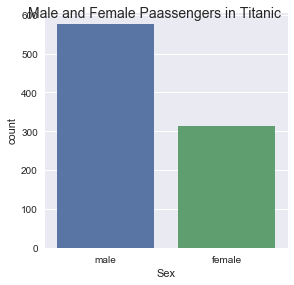

In [14]:

#Bar graph  created using Python's factorplot for comparision between male and female counts#
sns.factorplot('Sex',kind='count',data= Titanic)
sns.plt.suptitle('Male and Female Paassengers in Titanic',fontsize=14)


Question :How may people Survived in Titanic ?
Answer:Not even 50% people survived.

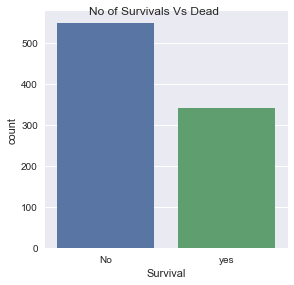

In [15]:
#Bar graph  created using Python's factorplot for comparision between Survivors and dead#
sns.factorplot('Survival',kind='count',data= Titanic)
sns.plt.suptitle('No of Survivals Vs Dead')


Question :Did More number of male survived or female survived ?
Answer: More Number of Female survived.

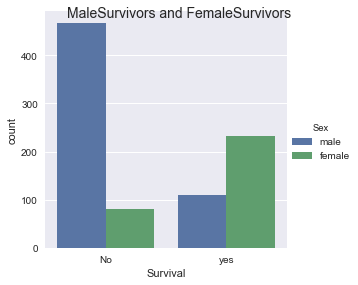

In [16]:

#Bar graph  created using Python's factorplot for comparision between survivors and dead catagorised in to Gender#
sns.factorplot('Survival',kind='count',hue='Sex',data= Titanic)
sns.plt.suptitle('MaleSurvivors and FemaleSurvivors',fontsize=14)

Question :What Age group of people survived?
Answer:More Number of people between the age group of 20 to 55 survived!

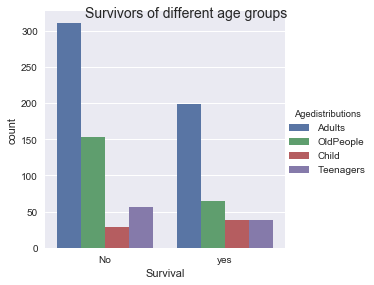

In [17]:
#Bar graph showing surviors catagorised between age group#
sns.factorplot('Survival',kind='count',hue='Agedistributions',data= Titanic)
sns.plt.suptitle('Survivors of different age groups',fontsize=14)

Question :Where did more number of people come from?
Answer:More Number of people came from Southhamptomton.

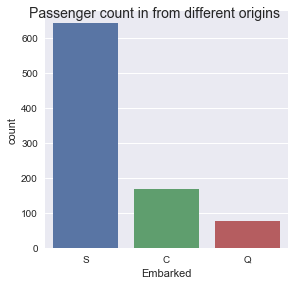

In [18]:

#Bar graph showing the number of passengers from different places#
sns.factorplot('Embarked',kind='count',data= Titanic)
sns.plt.suptitle('Passenger count in from different origins',fontsize=14)

Question :Where did more number of Survivors come from?
Answer:More Number of survivors are from cherbourg.

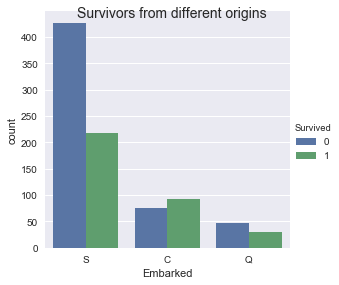

In [19]:
#Bar graph showing surviors from different palces#
sns.factorplot('Embarked',kind='count',hue='Survived',data= Titanic)
sns.plt.suptitle('Survivors from different origins',fontsize=14)

Question :Where did different kind of people come from and what kind of classes did they occupy?
Answer:Most of the people who occupied Upper class are from cherbourg .

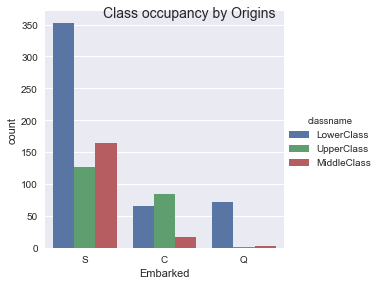

In [20]:

#Bar graph showing occupancy of classes catagorised by origins#
sns.factorplot('Embarked',kind='count',hue='classname',data= Titanic)
sns.plt.suptitle('Class occupancy by Origins',fontsize=14)

Question :Who survived in different classes?
Answer:More number of survivors are from upper class are between the age group of 40 to 50 and survivors from lower class are in the age group of 20s and middle class are between 20 aqnd 30.

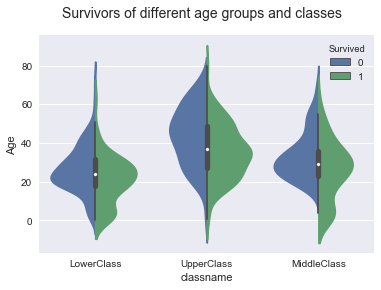

In [21]:

#Violin plot shoiwng survivors of different age groups from different classes #
sns.violinplot(x='classname', y='Age', hue = 'Survived', data=Titanic, split=True)
sns.plt.suptitle('Survivors of different age groups and classes',fontsize=14)

Question :Are the more number of survivors alone or with families?
Answer:More number of survivors have relations.

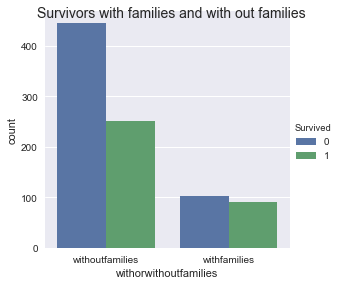

In [22]:

#Bar graph showing if more number of survivors have families or they alone?#
sns.factorplot('withorwithoutfamilies',hue='Survived',kind='count',data= Titanic)
sns.plt.suptitle('Survivors with families and with out families',fontsize=14)

Question :How may people are alone and how many people are with families? Answer:More number of people are alone. 

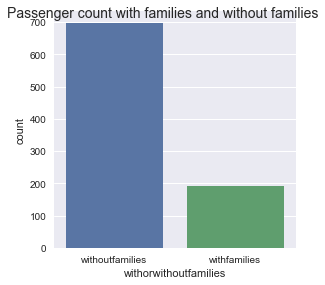

In [23]:

#Bar graph showing if most of the passengers have families or they alone?#
sns.factorplot('withorwithoutfamilies',kind='count',data= Titanic)
sns.plt.suptitle('Passenger count with families and without families',fontsize=14)

Question: what is the number of people with families survive and people without families survive? Answer: More number of people with families survive 

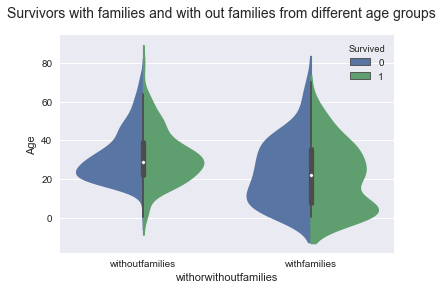

In [24]:

#Violin plot shoiwng survivors of different age groups catagorised on their relation ship status#
sns.violinplot(x='withorwithoutfamilies', y='Age', hue = 'Survived', data=Titanic, split=True)
sns.plt.suptitle('Survivors with families and with out families from different age groups',fontsize=14)

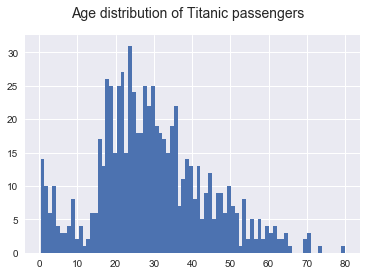

In [25]:

#Histogram depicting age grooups#
Titanic['Age'].hist(bins=80)
sns.plt.suptitle('Age distribution of Titanic passengers',fontsize=14)

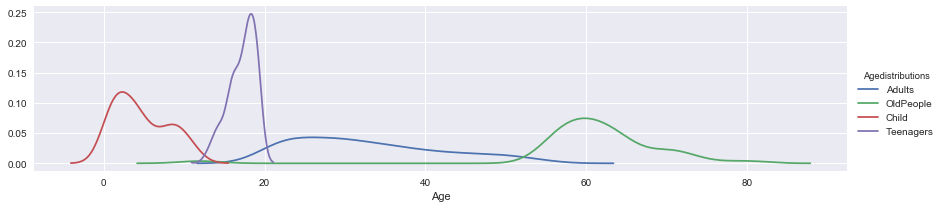

In [26]:
fig = sns.FacetGrid(Titanic,hue='Agedistributions',aspect = 4) #KDE plot created using Facetgrid#
fig.map(sns.kdeplot,'Age')
fig.add_legend()

# Conclusions
The interesting facts thats were found through this analysis is that Titanic Crew rescued children first and then female. Titanic Survivors can be catagorised in to different groups. Firstly more number of survivors are female and then most of them are from Cherbourg as upper class is occupied by passengers from Cherbourg. There is a relationship between survivals of Cherbourg and upper class. Titanic Crew tried to resuce people from Upper class and most of the upper class passengers are from Cherbourg.
But why did this happen? Is this because the Crew gave more importance to the lives of people in upperclass or did that depend on the which side of the ship was the upper class located and which side of the ship hit the iceburg and started sinking?
Limitations #
As the Age column has some nulls proper distribution of age groups could not be found.

In [27]:

Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId              891 non-null int64
Survived                 891 non-null int64
Pclass                   891 non-null int64
Name                     891 non-null object
Sex                      891 non-null object
Age                      714 non-null float64
SibSp                    891 non-null int64
Parch                    891 non-null int64
Ticket                   891 non-null object
Fare                     891 non-null float64
Cabin                    204 non-null object
Embarked                 889 non-null object
Agedistributions         891 non-null object
classname                891 non-null object
Survival                 891 non-null object
AnyRelations             891 non-null int64
withorwithoutfamilies    891 non-null object
dtypes: float64(2), int64(6), object(9)
memory usage: 118.4+ KB
